In [22]:
import matplotlib.pyplot as plt
import numpy as np
def convert_to_signed_16bit(value):
    if value >= 32768:
        return value - 65536
    else:
        return value
# Text dosyasından veriyi okuma ve işleme fonksiyonu
def read_and_process_data(file_path):
    timestamps = []
    ax_values = []
    ay_values = []
    az_values = []
    gx_values = []
    gy_values = []
    gz_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            timestamps.append(int(values[0]))
            ax_values.append(convert_to_signed_16bit(int(values[2]) )/ 16384.0)
            ay_values.append(convert_to_signed_16bit(int(values[4]) )/ 16384.0)
            az_values.append(convert_to_signed_16bit(int(values[6]) )/ 16384.0)
            gx_values.append(convert_to_signed_16bit(int(values[8]) )/ 131.0)
            gy_values.append(convert_to_signed_16bit(int(values[10]) )/ 131.0)
            gz_values.append(convert_to_signed_16bit(int(values[12]) )/ 131.0)
    timestamps = timestamps- timestamps[0] * np.ones(len(timestamps))
    return timestamps, ax_values, ay_values, az_values, gx_values, gy_values, gz_values


In [23]:
file_path = 'esra_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)


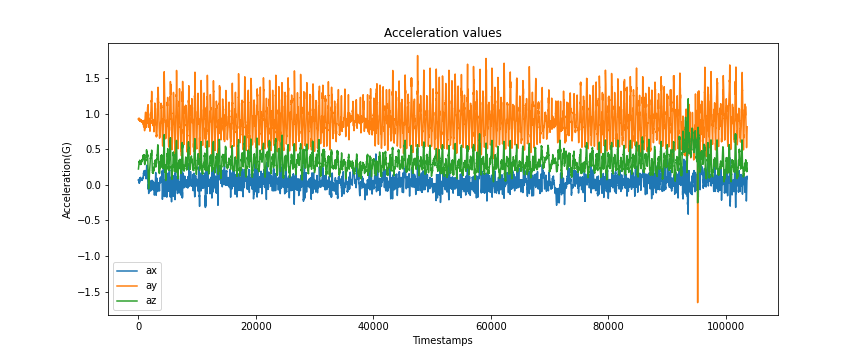

In [24]:
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=(12, 5))
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamps')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()
